In [65]:
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import math

In [35]:
data = pd.read_csv('datasets/mood_dataset_preprocessed.csv')

In [36]:
data.head()

,id,time,mood,appCat.communication,appCat.other,sms,circumplex.valence,screen,appCat.entertainment,appCat.weather,...,appCat.game,appCat.office,call,appCat.builtin,appCat.finance,circumplex.arousal,activity,appCat.utilities,appCat.unknown,appCat.travel
0,AS14.01,2014-02-26 13:00:00,6.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
1,AS14.01,2014-02-26 15:00:00,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
2,AS14.01,2014-02-26 18:00:00,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AS14.01,2014-02-26 21:00:00,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,AS14.01,2014-02-27 09:00:00,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0


In [37]:
data.fillna(0.0, inplace=True)

In [38]:
data['time'] = pd.to_datetime(data['time'])

In [39]:
result = data.groupby([data['time'].dt.date, 'id']).size().reset_index(name='count')

In [40]:
result

,time,id,count
0,2014-02-26,AS14.01,4
1,2014-02-27,AS14.01,3
2,2014-03-04,AS14.17,2
3,2014-03-05,AS14.08,3
4,2014-03-05,AS14.17,3
...,...,...,...
1263,2014-06-04,AS14.24,4
1264,2014-06-05,AS14.24,5
1265,2014-06-06,AS14.24,4
1266,2014-06-07,AS14.24,1


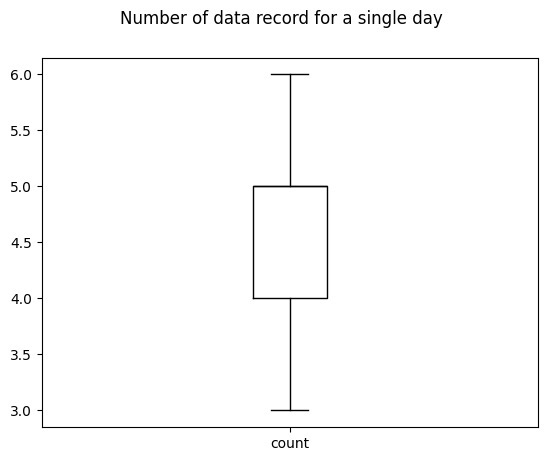

In [41]:
result.boxplot('count', grid=False, showfliers=False, color="black")
plt.suptitle("Number of data record for a single day")
plt.xlabel("")
plt.show()

In [42]:
data["next_mood"] = data.groupby('id')['mood'].shift(-1)

In [43]:
data.head(30)

,id,time,mood,appCat.communication,appCat.other,sms,circumplex.valence,screen,appCat.entertainment,appCat.weather,...,appCat.office,call,appCat.builtin,appCat.finance,circumplex.arousal,activity,appCat.utilities,appCat.unknown,appCat.travel,next_mood
0,AS14.01,2014-02-26 13:00:00,6.0,0.000,0.000,7.0,0.0,0.000000,0.000,0.000,...,0.000,17.0,0.000,0.000,-1.0,0.000000,0.000,0.000,0.000,6.0
1,AS14.01,2014-02-26 15:00:00,6.0,0.000,0.000,0.0,1.0,0.000000,0.000,0.000,...,0.000,0.0,0.000,0.000,-1.0,0.000000,0.000,0.000,0.000,6.0
2,AS14.01,2014-02-26 18:00:00,6.0,0.000,0.000,1.0,1.0,0.000000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.0,0.000000,0.000,0.000,0.000,7.0
3,AS14.01,2014-02-26 21:00:00,7.0,0.000,0.000,0.0,1.0,0.000000,0.000,0.000,...,0.000,1.0,0.000,0.000,1.0,0.000000,0.000,0.000,0.000,6.0
4,AS14.01,2014-02-27 09:00:00,6.0,0.000,0.000,1.0,0.0,0.000000,0.000,0.000,...,0.000,0.0,0.000,0.000,-2.0,0.000000,0.000,0.000,0.000,6.0
5,AS14.01,2014-02-27 12:00:00,6.0,0.000,0.000,0.0,0.0,0.000000,0.000,0.000,...,0.000,0.0,0.000,0.000,1.0,0.000000,0.000,0.000,0.000,7.0
6,AS14.01,2014-02-27 15:00:00,7.0,0.000,0.000,0.0,1.0,0.000000,0.000,0.000,...,0.000,0.0,0.000,0.000,1.0,0.000000,0.000,0.000,0.000,6.0
7,AS14.01,2014-03-21 09:00:00,6.0,2300.541,11.345,10.0,0.0,4793.343000,350.856,0.000,...,0.000,33.0,496.208,0.000,-1.0,0.238190,302.689,45.173,0.000,6.0
8,AS14.01,2014-03-21 11:00:00,6.0,1794.749,38.160,0.0,0.0,4240.973000,403.980,0.000,...,0.000,0.0,587.566,18.196,0.0,0.065054,18.061,0.000,71.305,7.0
9,AS14.01,2014-03-21 15:00:00,7.0,1488.071,70.860,0.0,1.0,5467.570000,287.389,0.000,...,62.281,4.0,979.241,0.000,1.0,1.931720,154.724,0.000,844.140,6.0


In [44]:
average_moods = data.groupby('id')['mood'].mean()
data['next_mood'] = data.apply(
    lambda row: int(average_moods[row['id']]) if pd.isna(row['next_mood']) else int(row['next_mood']),
    axis=1
)

In [45]:
data.head()

,id,time,mood,appCat.communication,appCat.other,sms,circumplex.valence,screen,appCat.entertainment,appCat.weather,...,appCat.office,call,appCat.builtin,appCat.finance,circumplex.arousal,activity,appCat.utilities,appCat.unknown,appCat.travel,next_mood
0,AS14.01,2014-02-26 13:00:00,6.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,17.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,6
1,AS14.01,2014-02-26 15:00:00,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,6
2,AS14.01,2014-02-26 18:00:00,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,AS14.01,2014-02-26 21:00:00,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6
4,AS14.01,2014-02-27 09:00:00,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,6


In [46]:
features = ['mood', 'appCat.communication', 'appCat.other', 'sms',
       'circumplex.valence', 'screen', 'appCat.entertainment',
       'appCat.weather', 'appCat.social', 'appCat.game', 'appCat.office',
       'call', 'appCat.builtin', 'appCat.finance', 'circumplex.arousal',
       'activity', 'appCat.utilities', 'appCat.unknown', 'appCat.travel']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

In [47]:
data.head()

,id,time,mood,appCat.communication,appCat.other,sms,circumplex.valence,screen,appCat.entertainment,appCat.weather,...,appCat.office,call,appCat.builtin,appCat.finance,circumplex.arousal,activity,appCat.utilities,appCat.unknown,appCat.travel,next_mood
0,AS14.01,2014-02-26 13:00:00,-0.961147,-0.63597,-0.218924,2.670284,-0.994860,-0.723386,-0.261718,-0.108907,...,-0.04747,2.034983,-0.171405,-0.117139,-0.860655,-0.640337,-0.137037,-0.106826,-0.119187,6
1,AS14.01,2014-02-26 15:00:00,-0.961147,-0.63597,-0.218924,-0.127389,0.492158,-0.723386,-0.261718,-0.108907,...,-0.04747,-0.117551,-0.171405,-0.117139,-0.860655,-0.640337,-0.137037,-0.106826,-0.119187,6
2,AS14.01,2014-02-26 18:00:00,-0.961147,-0.63597,-0.218924,0.272278,0.492158,-0.723386,-0.261718,-0.108907,...,-0.04747,-0.117551,-0.171405,-0.117139,0.093355,-0.640337,-0.137037,-0.106826,-0.119187,7
3,AS14.01,2014-02-26 21:00:00,0.007210,-0.63597,-0.218924,-0.127389,0.492158,-0.723386,-0.261718,-0.108907,...,-0.04747,0.009068,-0.171405,-0.117139,1.047364,-0.640337,-0.137037,-0.106826,-0.119187,6
4,AS14.01,2014-02-27 09:00:00,-0.961147,-0.63597,-0.218924,0.272278,-0.994860,-0.723386,-0.261718,-0.108907,...,-0.04747,-0.117551,-0.171405,-0.117139,-1.814665,-0.640337,-0.137037,-0.106826,-0.119187,6


In [48]:
result = data.groupby([data['time'].dt.date, 'id']).apply(lambda x:  x.drop(columns=['time']).values.tolist(), include_groups=False).reset_index(drop=True)

In [49]:
result

0       [[-0.9611469483783784, -0.6359701987760209, -0...
1       [[-0.9611469483783784, -0.6359701987760209, -0...
2       [[-0.9611469483783784, -0.6359701987760209, -0...
3       [[0.007209889593122241, -0.6359701987760209, -...
4       [[0.007209889593122241, -0.6359701987760209, -...
                              ...                        
1263    [[0.007209889593122241, -0.4851869928408751, -...
1264    [[0.007209889593122241, 1.5255510421329828, -0...
1265    [[0.007209889593122241, -0.5155687591907353, -...
1266    [[0.9755667275646229, -0.1299012146158456, -0....
1267    [[-0.9611469483783784, -0.22656320578060032, -...
Length: 1268, dtype: object

In [50]:
def average_lists(list_of_lists):
    if not list_of_lists:
        return []

    # Determine the length of the first sub-list to ensure uniformity
    length = len(list_of_lists[0])

    # Check all lists are of the same length
    if any(len(lst) != length for lst in list_of_lists):
        raise ValueError("All sub-lists must have the same length")

    # Calculate the average for each position
    averaged_list = [sum(values) / len(values) for values in zip(*list_of_lists)]
    return averaged_list

In [51]:
predictions = []
data = []
results = []

for single_data in result:
    predictions.append((int(single_data[-1][-1])))
    data.append(average_lists(single_data[:])[:-1])

In [52]:
len(data[0])

19

In [53]:
predictions = [i - 1 for i in predictions]

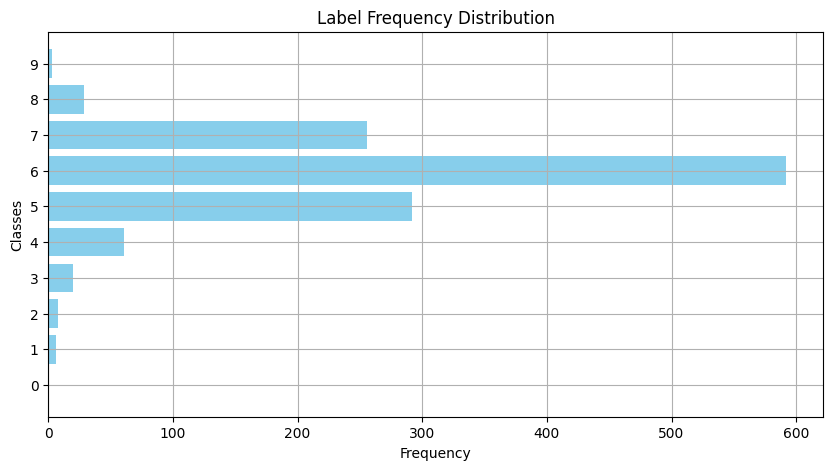

In [54]:
counter = Counter(predictions).most_common()
class_names = []
frequencies = []

for name, count in counter:
    class_names.append(name)
    frequencies.append(count)

plt.figure(figsize=(10, 5))
plt.barh(class_names, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Classes')
plt.yticks(range(10))
plt.title('Label Frequency Distribution')
plt.grid(True)
plt.savefig("labe_freq.png")
plt.show()

In [55]:
len(set(predictions))

10

In [23]:
pipeline = Pipeline([
    ('svr', SVR())
])

In [24]:
param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['auto', 'scale', 0.01, 0.1, 1]
}


In [25]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')

In [26]:
grid_search.fit(data, predictions)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....svr__C=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END ....svr__C=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END ....svr__C=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END ....svr__C=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END ....svr__C=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END ......svr__C=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END ......svr__C=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END ......svr__C=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END ......svr__C=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END ......svr__C=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END .......svr__C=0.1, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END .......svr__C=0.1, svr__gamma=auto, sv

GridSearchCV(cv=5, estimator=Pipeline(steps=[('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1, 10, 100],
                         'svr__gamma': ['auto', 'scale', 0.01, 0.1, 1],
                         'svr__kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [27]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'svr__C': 1, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}
Best cross-validation score: -0.95


In [56]:
grid_search.score(data, predictions)

-0.8617566434806748

In [66]:
predict_labels = grid_search.predict(data)

In [67]:
predict_labels = [math.ceil(i) for i in predict_labels]

In [68]:
predict_labels

[6,
 6,
 7,
 6,
 7,
 6,
 6,
 7,
 7,
 6,
 7,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 6,
 7,
 6,
 6,
 7,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 6,
 7,
 7,
 5,
 6,
 7,
 6,
 6,
 6,
 6,
 7,
 6,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 6,
 7,
 6,
 6,
 7,
 5,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 7,
 6,
 7,
 6,
 7,
 6,
 6,
 7,
 5,
 7,
 6,
 6,
 7,
 6,
 6,
 6,
 7,
 6,
 7,
 6,
 6,
 7,
 6,
 6,
 7,
 5,
 7,
 7,
 7,
 6,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 7,
 7,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 5,
 6,
 6,
 6,
 7,
 6,
 6,
 7,
 5,
 7,
 6,
 6,
 7,
 8,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 6,
 7,
 6,
 7,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 7,
 6,
 6,
 7,
 6,
 7,
 7,
 6,
 7,
 6,
 7,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 6,
 7,
 6,
 7,
 6,
 6,
 7,
 6,
 7,
 7,
 6,
 6,
 6,
 7,
 7,
 6,
 7,
 7,
 7,
 6,
 7,
 6,
 7,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 7,
 6,
 6,
 7,
 7,
 7,


In [69]:
num_correct = 0
for i in range(len(predict_labels)):
    if predict_labels[i] == predictions[i]:
        num_correct += 1
 

In [70]:
num_correct

520

In [71]:
num_correct / len(predict_labels)

0.41009463722397477